In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_set = pd.read_csv(r'titanic\train.csv', sep=',', encoding='utf-8')
train_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Para empezar este EDA podriamos iniciar con el metodo .info de pandas de la cual podemos rescatar distinta informacion, entre ellas la eficiencia en almacenamiento para los tipos de datos utilizados para cada columna, la cantidad de nulos y el peso total del archivo.

Ahora podemos observar varias cosas, primero que en la columna 'Age' y 'Cabin' hay bastantes nulos, y unos pocos en 'Embarked'.

In [40]:
print(train_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Ahora que hemos visto lo basico resulta buena idea avanzar un poco mas, con el siguiente codigo podemos usar el metodo value_counts para cada columna del train_set, con este mismo podemos observar los valores que mas y menos se repiten ordenados por repeticiones.

Si tuvieramos que decir algo seria sobre algun error en lo datos, para esta ocasion tenemos los siguientes:

* 'Age': Para esta columna podemos ver que hay edades con valores flotantes, es decir hay personas con 25.5 años lo cual no es normal en este tipo de columnas, tiene un valor continuo cuando deberia ser ordinal.

* 'Ticket': Para esta columna tenemos un formato poco claro de los tickets generados en esa epoca, ademas de que se repiten varias veces, no podemos decir que este erroneo ya que no sabemos como era la logistica de dicha epoca aun, por lo tanto simplemente hay que tenerlo en mente.

* 'Cabin': Aqui tenemos que hay varias personas que comparten las mismas habitaciones y ademas diferentes cuartos, esto no se comprende por ahora el porque es asi pero habra que echarle un ojo y verificar si son correctos.

In [41]:
columns = list(train_set.columns.values)

for i in columns:
    print(train_set[i].value_counts())

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64
Survived
0    549
1    342
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00

Ahora para esta ocasion se hace uso del metodo .describe, con el cual podremos ver mucha informacion general del train_set, obviando los valores no numericos.

Tenemos distina informacion como la cantidad, la media, la desviacion estandas (std), el minimo, los cuartos y su maximo en los cuales para ciertas columnas nos arroja informacion resaltante:

* 'Age': El minimo de la edad es 0.42 años, lo cual es muy raro y probablemente incorrecto, talvez tenia 42 años o otra edad, es algo a tener en cuanto al procesar la data.

* 'Fare': Para esta columna solo tenemos algo que cuestionarnos y es si es correcto el valor para el maximo de dicha columna, ya que la media es de 32, el 75% es el propio 31 pero el maximo se aproxima a lo que podria ser un outlier ya que resulta mucho mas grande de los normal

In [42]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Ahora para esta ocasion empezaremos a graficas con la ayuda de matplotlib para observar ciertos tipos de comportamientos a lo largo de todas las columnas que visualmente se aprecian mejor:

* 'Sibsp' y 'Parch': Aca podemos ver que mientras mas el valor crece meno probable es que sea mayor, es decir que lo mas probable es que sea entre 0 y 1.

* 'Fare': En esta columna podemos observar que hay unos valores atipicos al rededor de los 200 y 500.

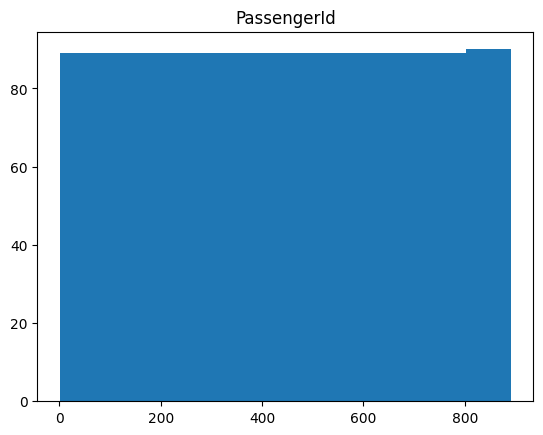

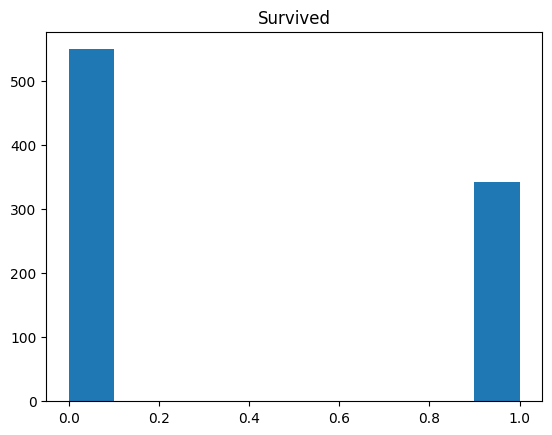

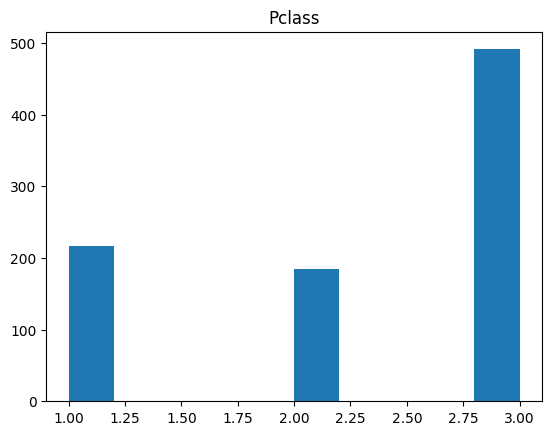

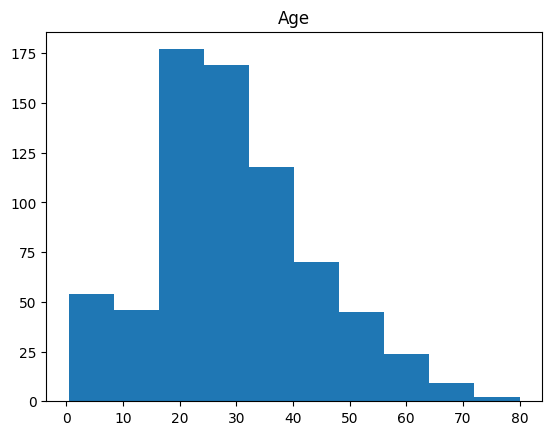

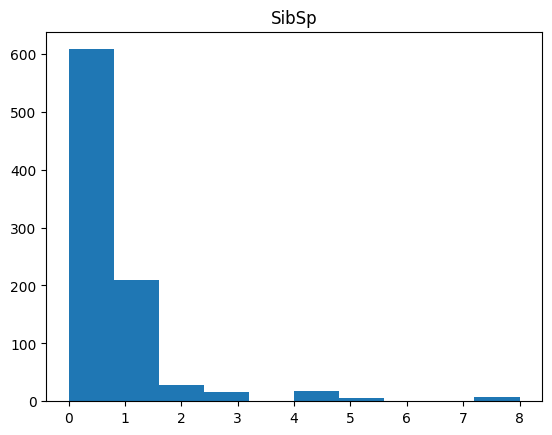

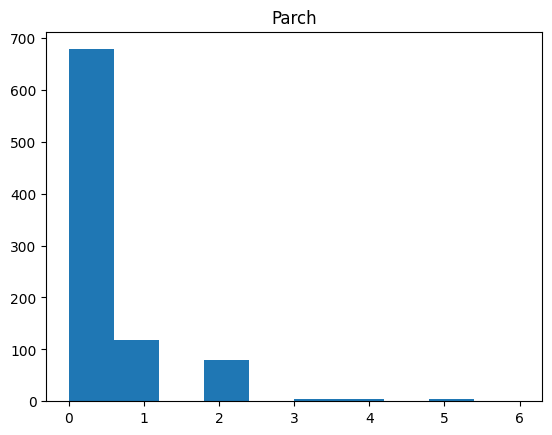

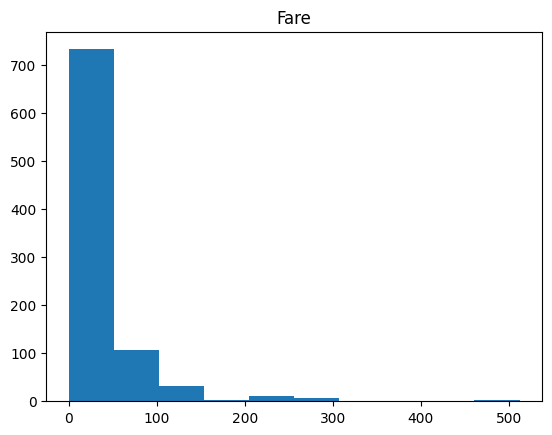

In [43]:
for i in columns:
    if train_set[i].dtype != 'object':
        plt.hist(train_set[i])
        plt.title(i)
        plt.show()

Ahora nos compete revisar la matriz de correlacion, con la cual podemos ver cuales son las variables mas importantes a la hora de determinar si un pasajero sobrevivio o no.

Entre esta matriz podemos observar que la columna 'Pclass' y 'Fare' Estan altamente relacionadas con si sobreviven o no, pero de iguamente dichas columnas estan muy bien correlacionadas con otras subcolumnas que a su vez se correlacionan bien con otras, por lo cual en general exceptuando por la columna Passengerid podemos decir que todas las demas columnas son lo suficientemente utiles para determinar si el pasajero sobrevivio o no.

Text(0.5, 1.0, 'Matriz de correlacion')

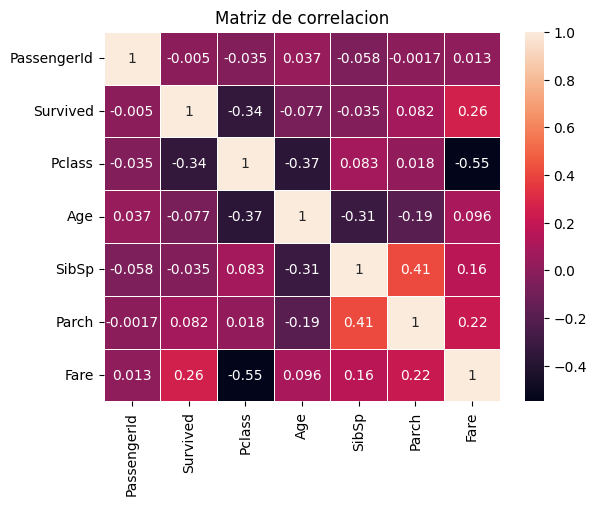

In [50]:
sns.heatmap(train_set.corr(numeric_only=True), annot=True, linewidths=.5)
plt.title('Matriz de correlacion')


Ahora para un mejor apoyo visual podemos ver que las columas 'Sibsp', 'Fare' y 'Parch' tienen varios puntos de outliers, los cuales habra que evaluar si se trata de un error o de algo dentro de lo normal.

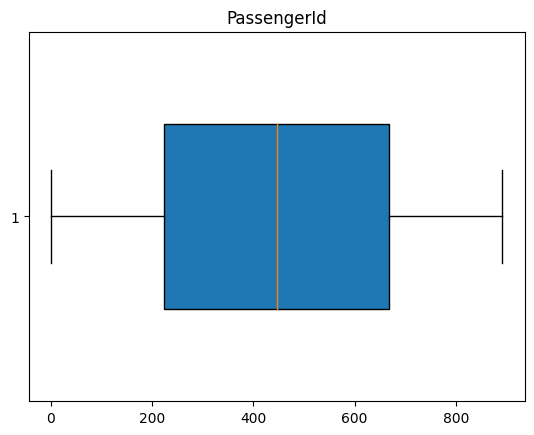

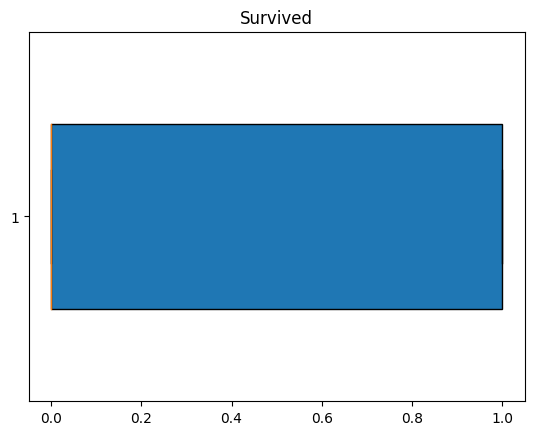

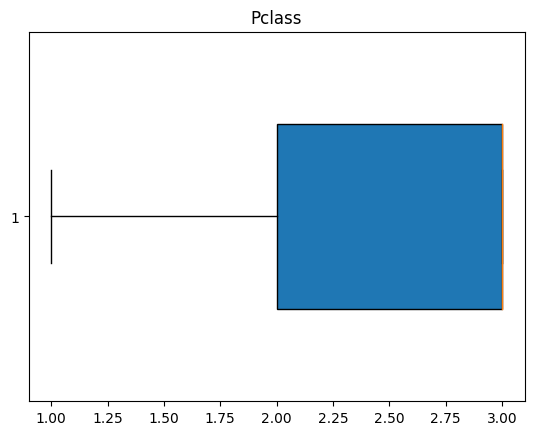

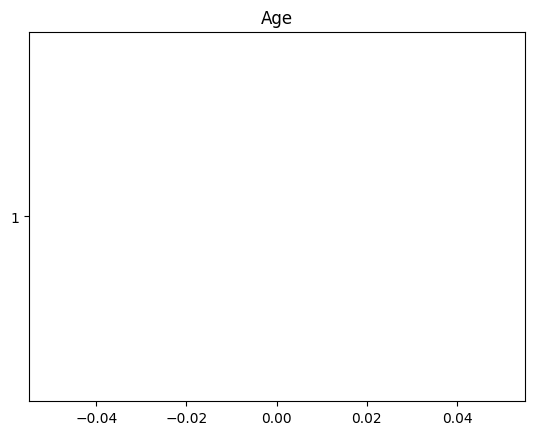

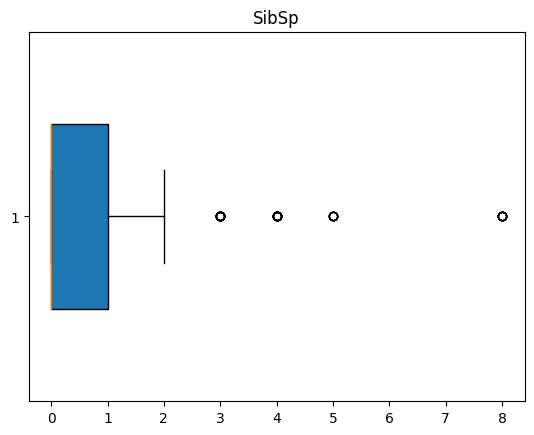

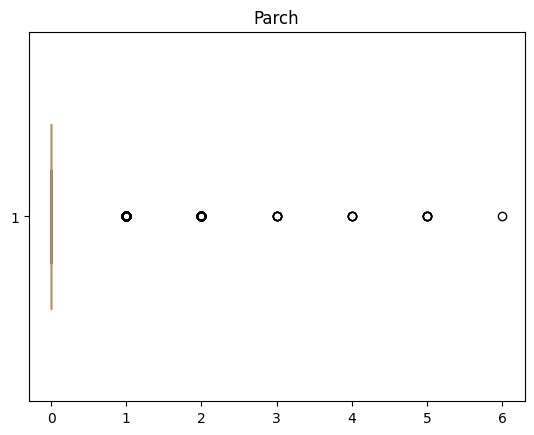

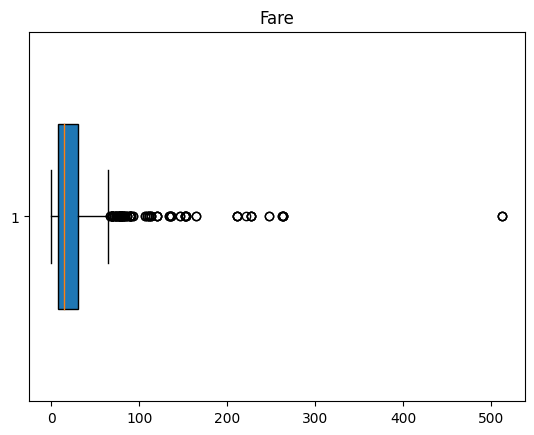

In [62]:
for i in columns:
    if train_set[i].dtype != 'object':
        plt.boxplot(train_set[i], vert=False, widths=.5, patch_artist=True)
        plt.title(i)
        plt.show()

Con Todo este EDA podemos resaltar varios puntos importantes sobre este train_set, a la hora de ser necesario un procesamiento de los datos nor arroja una forma mas clara de como empezar y debido al exahustivo analisis podemos tener mejor claridad de que esta bueno o malo.

Dicho esto se procedera con su ETL y apartado de Machine Learning